# Data Set

- beautifulsoup으로 statiz 사이트 웹 스크래핑

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2023&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&tr=&cv=&ml=1&sn=30&pa=0&si=&cn=&lr=1'

response = requests.get(url)

In [ ]:
html = response.text
soup = BeautifulSoup(html, 'html.parser')
temp = soup.find_all("table")[0]

In [ ]:
# statiz 사이트에서 가져올 데이터를 넣어줄 dataframe 생성
df = pd.DataFrame(index = range(343), columns = ["순", "이름", "연도", "WAR", "-", "타석", "타수", "득점", "안타", "2루타", "3루타", "홈런", "루타", "타점", 
                                                 "도루", "도루실패", "볼넷", "사구", "고의사구", "삼진", "병살", "희생타", "희생플라이", "타율", "출루", "장타", 
                                                 "OPS", "wOBA", "wRC+", "WAR2", "--"])
df

In [ ]:
# 태그 분석 후 패턴에 맞게 파싱
l = 0
temp2 = temp.find_all("tr")[3]
for j in range(3,414):
    temp2 = temp.find_all("tr")[j]
    if len(temp2.find_all("td")) == 31:
        for i in range(31):
            temp3 = temp2.find_all("td")[i]
            df.iloc[l,i] = temp3.get_text()
        l += 1

# baseball.csv로 저장하여 데이터 활용
df.to_csv('baseball.csv',index=False)

# 가설2.2020년 KBO 리그는 다른 시즌에 비해 빅볼(2루타, 홈런 등 장타)의 비율이 높다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 데이터

In [2]:
# 스크랩핑한 데이터 셋 불러오기
baseball_df = pd.read_csv('./baseball.csv',encoding='utf-8')
baseball_df

,순,이름,연도,WAR,-,타석,타수,득점,안타,2루타,...,희생타,희생플라이,타율,출루,장타,OPS,wOBA,wRC+,WAR2,--
0,1,삼성,97,38.92,1511,4976,4305,722,1194,254,...,88,32,0.277,0.356,0.462,0.819,0.359,124.0,38.92,NaN
1,2,삼성,93,38.88,1667,5000,4369,613,1169,169,...,53,38,0.268,0.344,0.408,0.752,0.349,126.9,38.88,NaN
2,3,LG,94,38.57,1541,4886,4265,655,1204,205,...,54,41,0.282,0.358,0.409,0.767,0.352,123.6,38.57,NaN
3,4,현대,0,38.53,1633,5240,4478,777,1245,246,...,74,46,0.278,0.365,0.483,0.849,0.369,119.2,38.53,NaN
4,5,삼성,2,38.22,1599,5304,4648,777,1321,266,...,55,34,0.284,0.360,0.472,0.831,0.362,122.7,38.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,롯데,2,8.23,1757,4986,4512,463,1105,206,...,49,22,0.245,0.305,0.356,0.661,0.295,76.7,8.23,NaN
339,340,쌍방울,99,7.43,1639,5054,4462,523,1108,177,...,76,33,0.248,0.320,0.358,0.678,0.303,71.9,7.43,NaN
340,341,삼미,82,6.11,867,2954,2653,302,637,117,...,33,17,0.240,0.304,0.345,0.648,0.298,79.0,6.11,NaN
341,342,KIA,15,5.51,2022,5454,4777,648,1197,223,...,79,43,0.251,0.326,0.392,0.718,0.320,79.0,5.51,NaN


In [3]:
baseball_df.columns

Index(['순', '이름', '연도', 'WAR', '-', '타석', '타수', '득점', '안타', '2루타', '3루타', '홈런',
       '루타', '타점', '도루', '도루실패', '볼넷', '사구', '고의사구', '삼진', '병살', '희생타',
       '희생플라이', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR2', '--'],
      dtype='object')

In [4]:
# 19xx, 20xx 연도의 구분이 필요하다.
baseball_df['연도'].unique()

array([97, 93, 94,  0,  2, 87, 18,  3, 91, 17, 16, 13, 11, 12, 15, 14, 20,
       10, 90, 92, 19, 89,  4, 22, 98, 86,  8, 85, 96, 95,  9, 99,  5, 21,
        1, 88, 23,  7,  6, 84, 83, 82])

In [5]:
def year_set(x):
    if x > 23:
        x = '19'+str(x)
    elif 10 <= x <= 23:
        x = '20'+str(x)
    elif x < 10:
        x = '200'+str(x)
    return x

baseball_df['연도'] = baseball_df['연도'].apply(year_set)
baseball_df['연도']

0      1997
1      1993
2      1994
3      2000
4      2002
       ... 
338    2002
339    1999
340    1982
341    2015
342    2020
Name: 연도, Length: 343, dtype: object

In [6]:
# 분석에 필요한 컬럼의 데이터만 뽑아낸다.
baseball_df = baseball_df[['이름','연도','안타','2루타','3루타','홈런','장타','OPS']]
baseball_df

,이름,연도,안타,2루타,3루타,홈런,장타,OPS
0,삼성,1997,1194,254,24,165,0.462,0.819
1,삼성,1993,1169,169,22,133,0.408,0.752
2,LG,1994,1204,205,36,88,0.409,0.767
3,현대,2000,1245,246,25,208,0.483,0.849
4,삼성,2002,1321,266,16,191,0.472,0.831
...,...,...,...,...,...,...,...,...
338,롯데,2002,1105,206,19,85,0.356,0.661
339,쌍방울,1999,1108,177,28,86,0.358,0.678
340,삼미,1982,637,117,20,40,0.345,0.648
341,KIA,2015,1197,223,22,136,0.392,0.718


## 1. 리그 시즌별 OPS 지표 / 홈런 지표 

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

### 전체 시즌 OPS 지표 / 홈런 지표

In [8]:
# 전체 시즌
season = baseball_df.groupby(['연도']).sum().reset_index()
season

,연도,안타,2루타,3루타,홈런,장타,OPS
0,1982,4247,726,95,362,2.340,4.366
1,1983,5102,806,108,403,2.204,4.143
2,1984,4995,823,115,383,2.192,4.150
3,1985,5700,940,109,450,2.248,4.240
4,1986,6234,979,161,397,2.452,4.702
5,1987,6666,1012,176,384,2.554,4.901
6,1988,6747,1034,147,482,2.649,4.998
7,1989,7099,1161,167,453,2.517,4.866
8,1990,7077,1169,177,541,2.594,4.962
9,1991,8514,1442,278,711,3.043,5.732


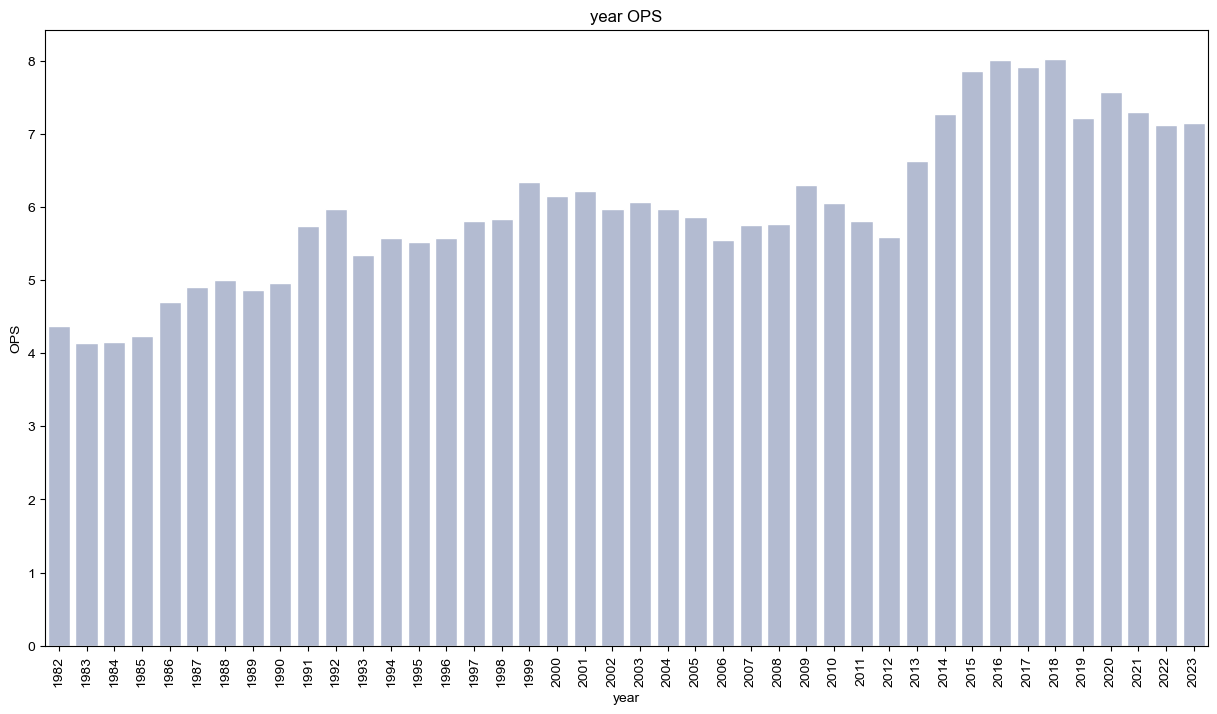

In [9]:
# 전체 시즌 ( 1982 ~ 2023 ) OPS

plt.figure(figsize=(15,8))
plt.title('year OPS')
plt.xticks(rotation=90)
sns.set_theme(style="whitegrid")

sns.barplot(x="연도", y="OPS", data=season, color='#AEB9D6')

plt.xlabel("year")
plt.ylabel("OPS")
plt.show()

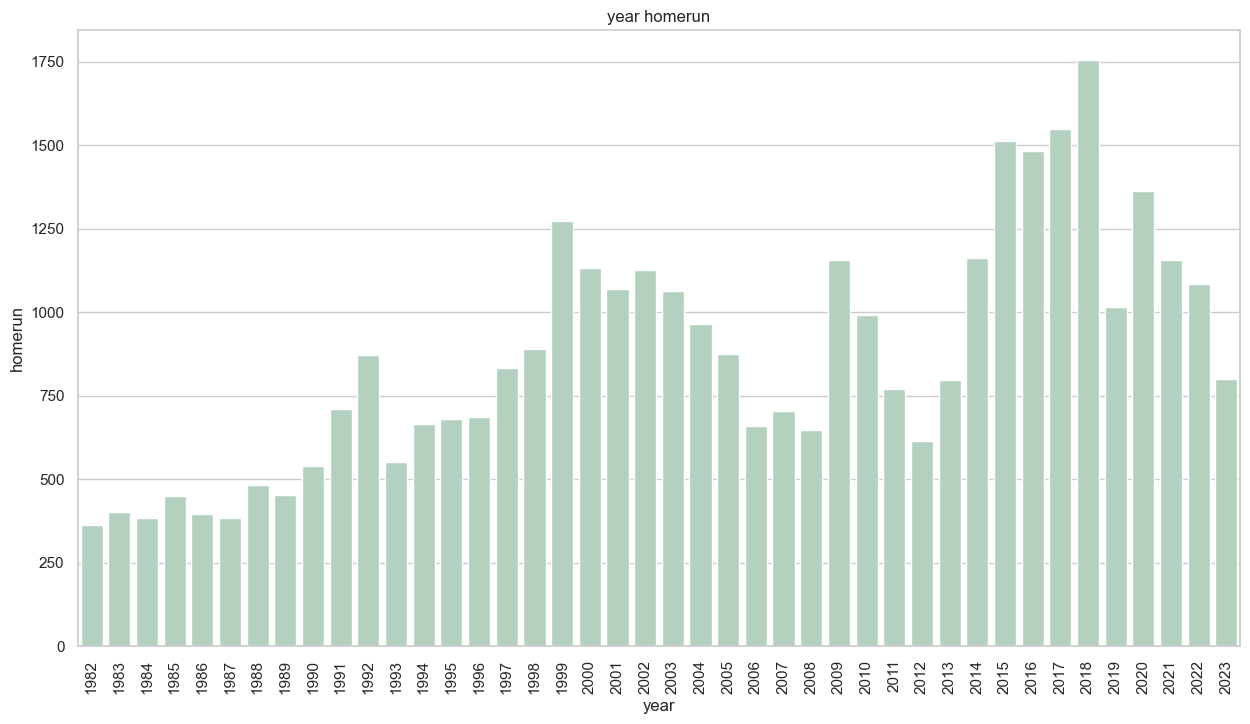

In [10]:
# 전체 시즌 ( 1982 ~ 2023 ) 홈런

plt.figure(figsize=(15,8))
plt.title('year homerun')
plt.xticks(rotation=90)
sns.set_theme(style="whitegrid")

sns.barplot(x="연도", y="홈런", data=season, color='#AED6BD')

plt.xlabel("year")
plt.ylabel("homerun")
plt.show()

전체 시즌에서 2020년이 유독 높다고 볼 수는 없지만 19년도 ~ 이후로의 지표를 봤을 때는 2020년이 OPS가 가장 높았다고 볼 수 있다.

### 19년도 이후 시즌 OPS/홈런 지표

In [11]:
# 19년도 이후 시즌 (2019 ~ 2023) OPS
season_19_to_23 = baseball_df[baseball_df['연도']>'2018'].groupby(['연도']).sum().reset_index()
season_19_to_23

,연도,안타,2루타,3루타,홈런,장타,OPS
0,2019,13142,2288,226,1014,3.844,7.217
1,2020,13544,2325,183,1363,4.088,7.572
2,2021,12561,2182,163,1157,3.828,7.292
3,2022,12802,2221,202,1085,3.790,7.122
4,2023,11293,1937,198,800,3.748,7.141


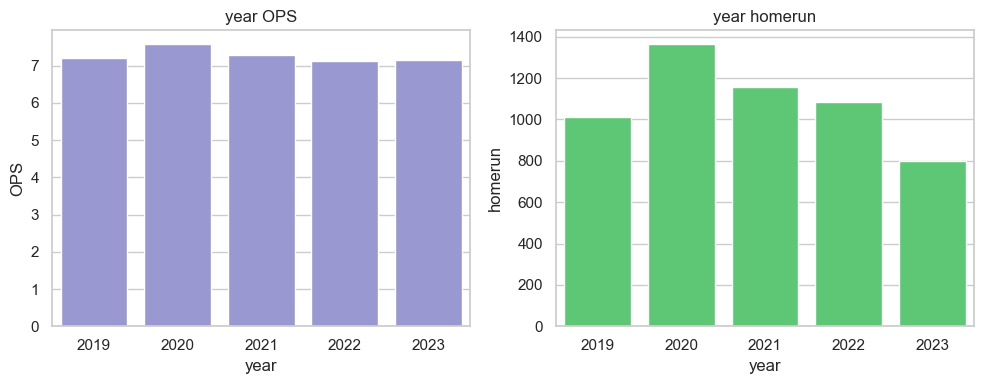

In [12]:
# 19년도 이후 시즌 (2019 ~ 2023) OPS / 홈런

fig, ax = plt.subplots(1,2,figsize=(10,4))

sns.barplot(x=season_19_to_23["연도"], y=season_19_to_23["OPS"], ax=ax[0],color='#908FD9')
ax[0].set_title('year OPS')

sns.barplot(x=season_19_to_23["연도"], y=season_19_to_23["홈런"], ax=ax[1],color='#4CD96B')
ax[1].set_title('year homerun')


ax[0].set_xlabel('year')


ax[1].set_xlabel('year')
ax[1].set_ylabel('homerun')

plt.tight_layout()
plt.show()

19년도 이후 시즌으로 봤을 때, OPS는 다른 시즌과 비슷했지만, 홈런 개수가 2020년에 유독 많았다.

## 2. 2019년 이후 시즌 별 홈런/3루타 비율

In [13]:
# 19년도 이후 데이터
season_19_to_23

,연도,안타,2루타,3루타,홈런,장타,OPS
0,2019,13142,2288,226,1014,3.844,7.217
1,2020,13544,2325,183,1363,4.088,7.572
2,2021,12561,2182,163,1157,3.828,7.292
3,2022,12802,2221,202,1085,3.790,7.122
4,2023,11293,1937,198,800,3.748,7.141


In [14]:
# 홈런+3루타 / 안타
season_19_to_23['home+3_divide_allhit'] = (season_19_to_23['홈런']+season_19_to_23['3루타'])/season_19_to_23['안타']
season_19_to_23

,연도,안타,2루타,3루타,홈런,장타,OPS,home+3_divide_allhit
0,2019,13142,2288,226,1014,3.844,7.217,0.094354
1,2020,13544,2325,183,1363,4.088,7.572,0.114146
2,2021,12561,2182,163,1157,3.828,7.292,0.105087
3,2022,12802,2221,202,1085,3.790,7.122,0.100531
4,2023,11293,1937,198,800,3.748,7.141,0.088373


In [15]:
# 홈런 / 안타
season_19_to_23['home_divide_allhit'] = (season_19_to_23['홈런']/season_19_to_23['안타'])
season_19_to_23

,연도,안타,2루타,3루타,홈런,장타,OPS,home+3_divide_allhit,home_divide_allhit
0,2019,13142,2288,226,1014,3.844,7.217,0.094354,0.077157
1,2020,13544,2325,183,1363,4.088,7.572,0.114146,0.100635
2,2021,12561,2182,163,1157,3.828,7.292,0.105087,0.092111
3,2022,12802,2221,202,1085,3.790,7.122,0.100531,0.084752
4,2023,11293,1937,198,800,3.748,7.141,0.088373,0.070840


In [16]:
# 3루타 / 안타
season_19_to_23['3_divide_allhit'] = (season_19_to_23['3루타']/season_19_to_23['안타'])
season_19_to_23

,연도,안타,2루타,3루타,홈런,장타,OPS,home+3_divide_allhit,home_divide_allhit,3_divide_allhit
0,2019,13142,2288,226,1014,3.844,7.217,0.094354,0.077157,0.017197
1,2020,13544,2325,183,1363,4.088,7.572,0.114146,0.100635,0.013512
2,2021,12561,2182,163,1157,3.828,7.292,0.105087,0.092111,0.012977
3,2022,12802,2221,202,1085,3.790,7.122,0.100531,0.084752,0.015779
4,2023,11293,1937,198,800,3.748,7.141,0.088373,0.070840,0.017533


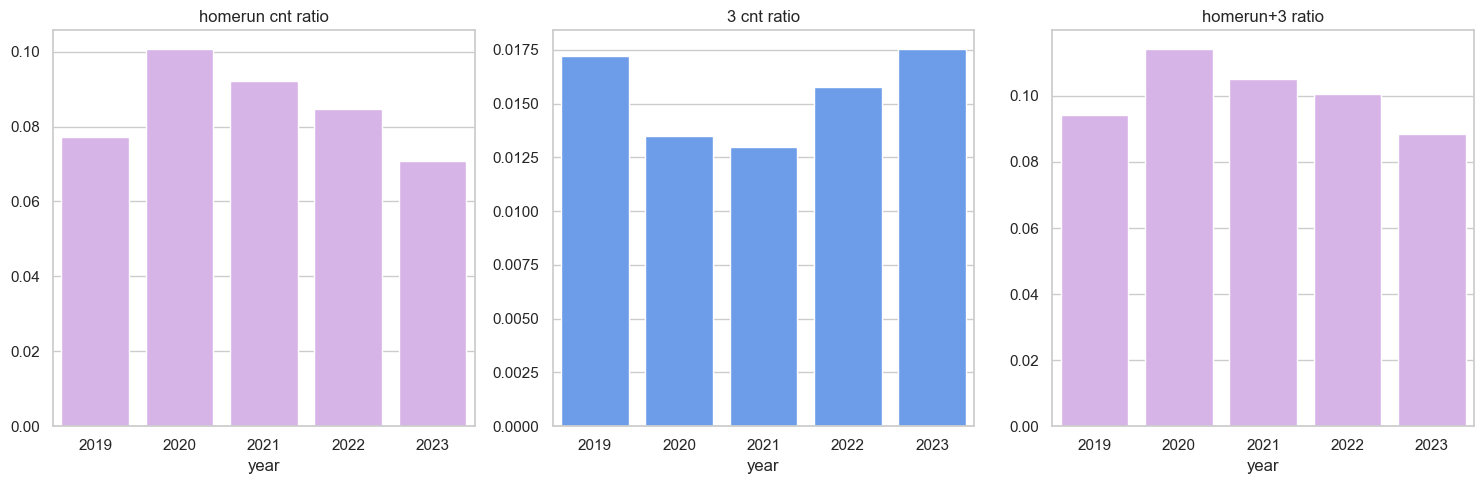

In [17]:
# 19년도 이후 시즌 (2019 ~ 2023) 홈런/3루타 비율(전체 안타 중)

fig, ax = plt.subplots(1,3,figsize=(15,5))
    
sns.barplot(x=season_19_to_23["연도"], y=season_19_to_23["home_divide_allhit"], ax=ax[0],color='#DAABF0')
ax[0].set_title('homerun cnt ratio')

sns.barplot(x=season_19_to_23["연도"], y=season_19_to_23["3_divide_allhit"], ax=ax[1],color='#5898FC')
ax[1].set_title('3 cnt ratio')

sns.barplot(x=season_19_to_23["연도"], y=season_19_to_23["home+3_divide_allhit"], ax=ax[2],color='#DAABF0')
ax[2].set_title('homerun+3 ratio')

ax[0].set_xlabel('year')
ax[1].set_xlabel('year')
ax[2].set_xlabel('year')

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

plt.tight_layout()
plt.show()

2020년에 3루타는 다른 시즌에 비해 비율이 높지 않다.